# Golden Spiral

This notebook explores the approximation of the golden spiral based on the Fibonacci sequence. 
It allows the user to construct a series of Fibonacci rectangles and to plot quarter circles inside them to approximate 
a golden spiral.

The notebook works through the construction of several auxiliary functions, leading up to the definition of a function for
plotting an approximation of a golden spiral based on the Fibonacci sequence. If you're not interested in the auxiliary functions, feel free to skip to the end of the notebook to see a golden spiral.

In [1]:
# Import and configure some modules for calculation and plotting

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=4)
plt.rc('figure', dpi=200)
plt.rc('axes', axisbelow=True, titlesize=5)
plt.rc('lines', linewidth=1)
plt.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.animation import FuncAnimation

In [2]:
def fibs(n):
    '''
    Computes the first n numbers of the Fibonacci sequence 0, 1, 1, 2, 3, 5, ...
    
    :param n: how many numbers are required
    :return: a numpy array of size n containing the first n numbers in the Fibonnacci sequence
    '''
    assert n > 0
    result = np.empty(n, dtype=np.int64)
    result[0] = 0
    if n >= 2:
        result[0] = 0
        result[1] = 1
        for i in range(2, n):
            result[i] = result[i-2] + result[i-1]
    return result

In [3]:
# Example of using fibs()

print(fibs(7))

[0 1 1 2 3 5 8]


In [4]:
def quarter_circle_plot(radius=1.0, theta_init=0.0, pos=[0.0,0.0]):
    '''
    Plot a quarter circle of specified radius, starting at angle theta_init,
    with the first point translated to the position given by trans

    :param radius: radius of the circle
    :param theta_init: starting angle (use 0.0, np.pi/2, np.pi, 3*np.pi/2 for the standard quadrants)
    :param pos: starting coordinates of the quarter circle
    '''
    theta = np.linspace(start=theta_init, stop=theta_init+np.pi/2, num=1000)
    tx = pos[0] - radius * np.cos(theta[0])
    ty = pos[1] - radius * np.sin(theta[1])
    xc = radius * np.cos(theta) + tx
    yc = radius * np.sin(theta) + ty
    plt.plot(xc, yc, color=[20/255,20/255,20/255], linestyle='-')

<IPython.core.display.Javascript object>


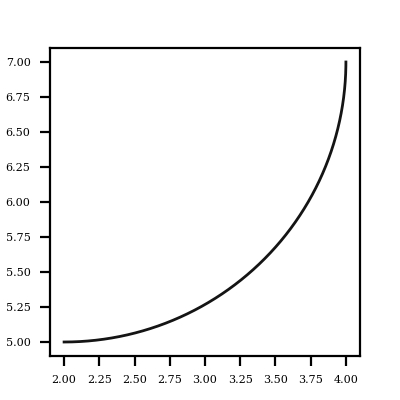

In [5]:
# Example of use of quarter_circle_plot()

fig, ax = plt.subplots(figsize=(2,2))
quarter_circle_plot(radius=2.0, theta_init=3 * np.pi / 2, pos=(2.0,5.0))

In [6]:
def rect(xy, width, height):
    '''
    Plot a rectangle
    
    :param xy: coordinates of the anchor point
    :param width: width of the rectangle
    :param height: height of the rectangle
    '''
    xs = [xy[0], xy[0] + width, xy[0] + width, xy[0], xy[0]]
    ys = [xy[1], xy[1], xy[1] + height, xy[1] + height, xy[1]]
    plt.plot(xs, ys, '-k', lw=0.1)

<IPython.core.display.Javascript object>


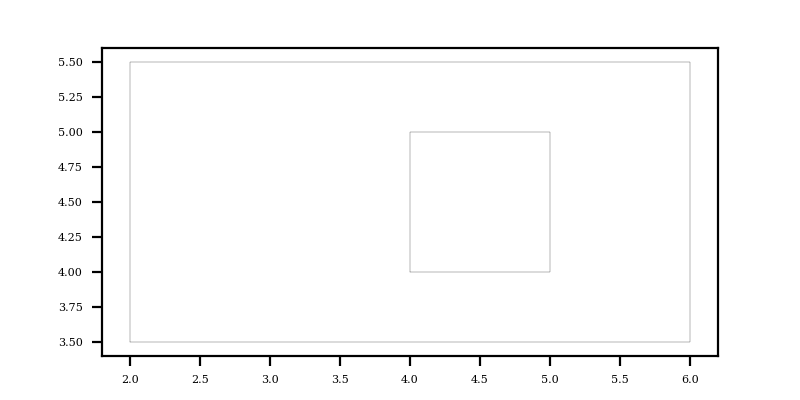

In [7]:
# Example of use of rect()

fig, ax = plt.subplots(figsize=(4,2))
ax.set_aspect('equal')
rect([2.0, 3.5], 4.0, 2.0)
rect([4.0,4.0], 1.0, 1.0)

In [8]:
def fib_rects(n, anchor=[0.0,0.0], unit=0.1):
    '''
    Plot rectangles based on the Fibonacci sequence.
    
    :param n: number of rectangles to draw
    :param anchor: anchor point of the first rectangle
    :param unit: the size of one unit
    
    :return: the parameters needed to draw quarter circles in the rectangles if desired
    '''
    lengths = fibs(n+2) * unit
    cycle = ['B', 'R', 'A', 'L']
    pos = 'B'
    quadrant = [0., np.pi / 2., np.pi, 3 * np.pi / 2.]
    qcircle = [[]] * (n + 1)
    for i in range(1, n+1):
        rect(anchor, lengths[i], lengths[i])
        if pos == 'B': # Move Right
            qcircle[i] = [lengths[i], quadrant[2], [anchor[0], anchor[1] + lengths[i]]]
            anchor[0] += lengths[i]
        elif pos == 'R': # Move Above
            qcircle[i] = [lengths[i], quadrant[3], [anchor[0], anchor[1]]]
            anchor[0] -= lengths[i-1]
            anchor[1] += lengths[i]
        elif pos == 'A': # Move Left
            qcircle[i] = [lengths[i], quadrant[0], [anchor[0] + lengths[i], anchor[1]]]
            anchor[0] -= lengths[i+1]
            anchor[1] -= lengths[i-1] 
        else: # pos == 'L' Move Below
            qcircle[i] = [lengths[i], quadrant[1], [anchor[0] + lengths[i], anchor[1] + lengths[i]]]
            anchor[1] -= lengths[i+1]
        pos = cycle[i % 4] 
    return qcircle[1:]

<IPython.core.display.Javascript object>


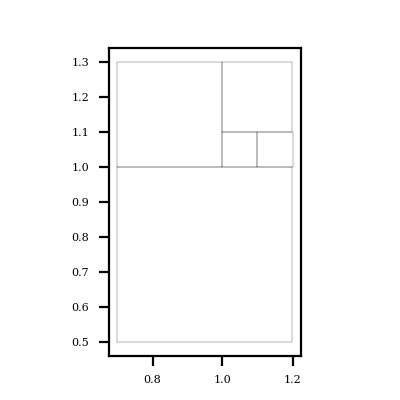

In [9]:
# Example of use of fib_rects()

fig, ax = plt.subplots(figsize=(2,2))
ax.set_aspect('equal')
_ = fib_rects(5, anchor=[1.,1.])

In [10]:
def golden_spiral_fib(n, init=0, *, anchor=[0.0,0.0], unit=0.1):
    '''
    Plot an approximation of a golden spiral based on quarter circles inscribed
    in n Fibonacci rectangles
    
    :param n: number of Fibonacci rectangles required
    :param init: start drawing from the init-th rectangle
    :param anchor: anchor point of the first rectangle
    :param unit: the size of one unit
    '''
    qc = fib_rects(n)
    for i in range(init, len(qc)):
        quarter_circle_plot(*qc[i])

<IPython.core.display.Javascript object>


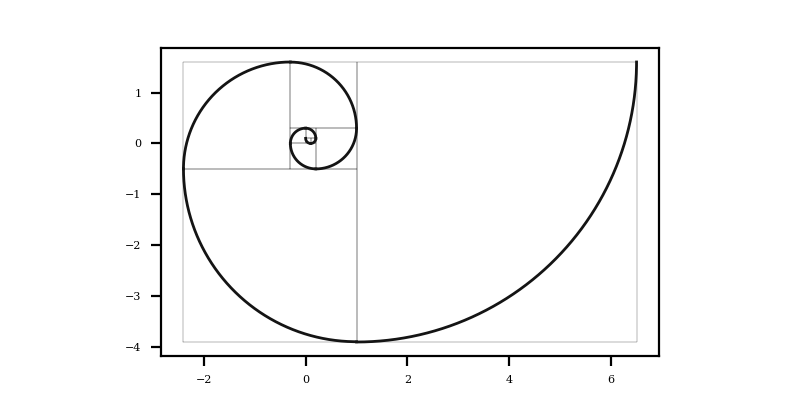

In [11]:
# Example of use of golden_spiral_fib()
# Start drawing from first fib rectangle

fig, ax = plt.subplots(figsize=(4,2))
ax.set_aspect('equal')
golden_spiral_fib(10, 0)

<IPython.core.display.Javascript object>


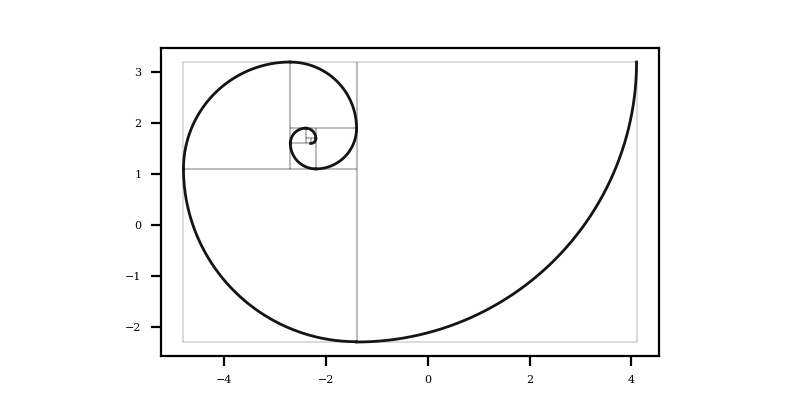

In [12]:
# Example of use of golden_spiral_fib()
# Start drawing from second fib rectangle

fig, ax = plt.subplots(figsize=(4,2))
ax.set_aspect('equal')
golden_spiral_fib(10, 1)

<IPython.core.display.Javascript object>


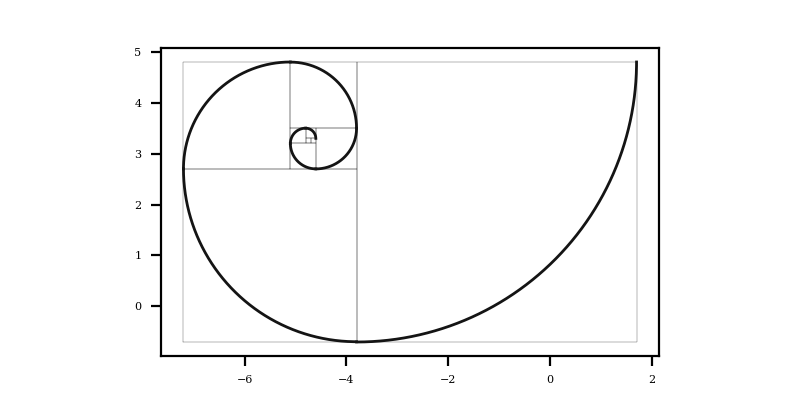

In [13]:
# Example of use of golden_spiral_fib()
# Start drawing from third fib rectangle

fig, ax = plt.subplots(figsize=(4,2))
ax.set_aspect('equal')
golden_spiral_fib(10, 2)

In [14]:
def golden_spiral(n=8.0, radius=1.0, pos=[0., 0.]):
    '''
    Plot a golden spiral by continuously increasing the radius by
    a factor such that the radius, r, is r * phi ** t, where
    phi is the golden ratio, (sqrt(5) + 1) / 2, and t counts the number
    of quarter turns.
    
    :param n: the number of complete revolutions required
    :param radius: the initial size of the radius
    :param pos: the position of the first point of the spiral
    '''
    phi = (1. + np.sqrt(5.)) / 2
    theta = np.arange(0, 2 * n * np.pi, np.pi / 1000.)
    tx = pos[0] - radius * np.cos(theta[0])
    ty = pos[1] - radius * np.sin(theta[1])
    a = radius
    b = np.log(phi) / (np.pi / 2)
    r = a * (np.e ** (b * theta))
    xc = r * np.cos(theta) + tx
    yc = r * np.sin(theta) + ty
    plt.plot(xc, yc, color=[20/255,20/255,20/255], linestyle='-')

<IPython.core.display.Javascript object>


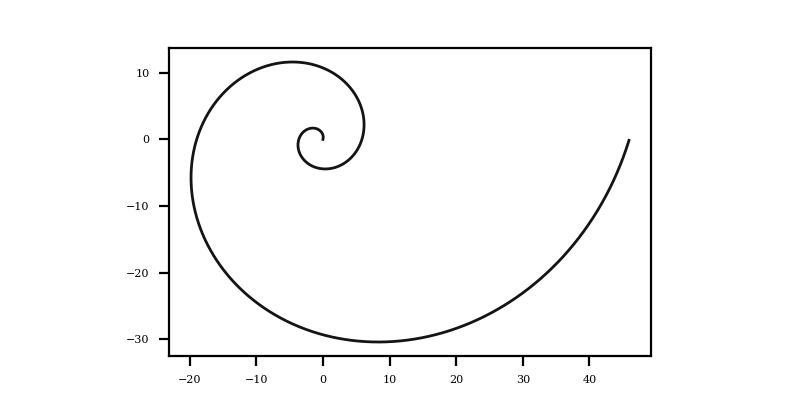

In [15]:
# Example of use of golden_spiral()
# Gives an impression of a 'perfect' golden spiral
# after two complete revolutions

fig, ax = plt.subplots(figsize=(4,2))
ax.set_aspect('equal')
golden_spiral(n=2.0)